# Imports

In [1]:
import pandas as pd
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))
from ev_forecasting_package.data_processing.VehicleRegistrationDataProcessing import LSOAVehicleRegistrationDataProcessor
from ev_forecasting_package.data_processing.SpatialDataProcessing import DistributionSubstationDataProcessor, LSOABoundariesDataProcessor
from ev_forecasting_package.models.DataMapper import DataMapper

# Vehicle Registration Data

In [2]:
lsoa_vehicle_registration_data_processor = LSOAVehicleRegistrationDataProcessor(
    lsoa_lookup_path='../data/large_datasets/lsoa_boundaries/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv'
)
raw_data_path = '../data/large_datasets/vehicle_registrations/raw_data'
meta_data = {
    'v_reg': {
        'file_name': 'df_VEH0125_2023_Q4.csv',
        'first': 5,
        'last': 57,
        'na_values': ['[c]', '[x]'],
    },
    'piv_reg': {
        'file_name': 'df_VEH0145_2023_Q4.csv',
        'first': 5,
        'last': 56,
        'na_values': ['[c]', '[x]'],
    }
}
filters_dict = {
    'v_reg': {
        'query': "BodyType == 'Cars' and Keepership == 'Private' and LicenceStatus == 'Licensed'",
        'dropped_cols': ['BodyType', 'Keepership', 'LicenceStatus', 'LSOA11NM']
    },
    'piv_reg': {
        'query': "Keepership == 'Private'",
        'dropped_cols': ['Keepership', 'LSOA11NM'] 
    }
}
LAD = 'Bath and North East Somerset'
lsoa_vehicle_registration_data_processor.run_pipeline(raw_data_path, meta_data, filters_dict, LAD)

Loading v_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0125_2023_Q4.csv
Loading piv_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0145_2023_Q4.csv
Pipeline run successfully


# Distribution Substation Data

In [3]:
distribution_substation_data_processor = DistributionSubstationDataProcessor('../data/large_datasets/distribution_network/')
distribution_substation_data_processor.run_pipeline(
    ds_data_filename='distribution-substations-03-02-25.csv', 
    ds_geo_filename='south-west-distribution-03-02-25.gpkg',
    place='Bath and North East Somerset'
)
ds_gdf_banes = distribution_substation_data_processor.ds_gdf_filtered
ds_gdf_banes.head()

,Substation Number,geometry,NRID,NR_TYPE_ID,NAME,PRIM_NRID,PRIM_NR,PRIM_NRID_NAME,BSP_NRID,BSP_NR,...,Name,Grid Reference,Longitude,Latitude,Day Max Demand,Night Max Demand,Substation Rating,EV Chargers,Customers,Location
Substation Number,,,,,,,,,,,,,,,,,,,,,
110055,110055,"POLYGON ((-2.46167 51.39973, -2.46174 51.39976...",33528,19,Saltford Od,15042,111481,Keynsham East,119,162633,...,Saltford Od,ST682140670940,-2.45840,51.401900,302.0,205.0,500.0,3.0,132.0,POINT (-2.4584 51.4019)
110060,110060,"POLYGON ((-2.49497 51.40702, -2.49581 51.40727...",33532,19,Keelings Ss,15042,111481,Keynsham East,119,162633,...,Keelings Ss,ST658270679910,-2.49280,51.409800,132.0,65.0,315.0,2.0,113.0,POINT (-2.4928 51.4098)
110066,110066,"POLYGON ((-2.49769 51.40349, -2.49779 51.40351...",33542,19,Burnett Rd K,15042,111481,Keynsham East,119,162633,...,Burnett Rd K,ST658460673840,-2.49242,51.404389,116.0,58.0,300.0,4.0,95.0,POINT (-2.49242 51.40439)
110165,110165,"POLYGON ((-2.5136 51.41669, -2.51393 51.41716,...",33683,19,Stockwood Vale Od,15049,113180,Keynsham West,128239,113372,...,Stockwood Vale Od,ST644800689440,-2.51220,51.418300,69.0,34.0,500.0,0.0,47.0,POINT (-2.5122 51.4183)
110182,110182,"POLYGON ((-2.46675 51.40341, -2.46675 51.40341...",33715,19,Grange Road K,15042,111481,Keynsham East,119,162633,...,Grange Road K Saltford,ST677120673570,-2.46560,51.404300,78.0,41.0,315.0,4.0,55.0,POINT (-2.4656 51.4043)


# LSOA Boundary Data

In [4]:
lsoa_boundaries_data_processor = LSOABoundariesDataProcessor('../data/large_datasets/lsoa_boundaries/')
lsoa_boundaries_data_processor.run_pipeline(
    lsoa_geo_filename='LSOA_2011_EW_BFC_V3_WGS84/LSOA_2011_EW_BFC_V3_WGS84.shp',
    lad='Bath and North East Somerset'
)
lsoa_gdf_banes = lsoa_boundaries_data_processor.lsoa_gdf_filtered
lsoa_gdf_banes.head()

,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry
LSOA11CD,,,,,,,,
E01014370,Bath and North East Somerset 007A,375084,164994,-2.35941,51.3834,4168.323516,764bfbce-a1cc-4028-be4b-26902051bf9e,"POLYGON ((-2.35647 51.3892, -2.35618 51.38913,..."
E01014371,Bath and North East Somerset 007B,375328,164841,-2.35590,51.3821,4146.079795,213bd1e8-27ac-4ffc-8401-5c79156dc8f0,"POLYGON ((-2.35166 51.38534, -2.35158 51.3853,..."
E01014372,Bath and North East Somerset 007C,374832,165378,-2.36306,51.3869,2870.144109,65aeea18-794e-4244-8a7b-d820f94a90a0,"POLYGON ((-2.35597 51.3895, -2.35587 51.38942,..."
E01014373,Bath and North East Somerset 010A,377791,167691,-2.32068,51.4078,6720.118267,396a2c40-1a96-4bee-b5d2-317e937ae4ae,"POLYGON ((-2.32115 51.41364, -2.32114 51.41364..."
E01014374,Bath and North East Somerset 010B,378059,166769,-2.31677,51.3995,19927.251976,b192f67c-f8df-4435-bb2f-abaefc0ce29e,"POLYGON ((-2.30592 51.40806, -2.30591 51.40806..."


# Using the DataMapper Class

In [5]:
data_mapper = DataMapper(
    source_geometries=lsoa_gdf_banes.geometry,
    target_geometries=ds_gdf_banes.geometry,
    target_customer_counts=ds_gdf_banes.Customers,
)

In [6]:
v_reg_data = lsoa_vehicle_registration_data_processor.v_reg_df.loc['2023 Q4']
bev_reg_data = lsoa_vehicle_registration_data_processor.bev_reg_df.loc['2023 Q4']
phev_reg_data = lsoa_vehicle_registration_data_processor.phev_reg_df.loc['2023 Q4']
data_dict = {
    'Vehicles' : pd.DataFrame({'mean': v_reg_data, 'std_dev': v_reg_data*0.1}),
    'BEVs' : pd.DataFrame({'mean': bev_reg_data, 'std_dev': bev_reg_data*0.1}),
    'PHEVs' : pd.DataFrame({'mean': phev_reg_data, 'std_dev': phev_reg_data*0.1})
} # Example std_dev used here

data_mapper.map_data(data_dict)
data_mapper.mapped_data_params['Vehicles'].head()

,mean,std_dev
Substation Number,,
110055,148.006526,20.709108
110060,124.242632,17.566772
110066,120.700671,18.215711
110165,41.506426,9.345225
110182,72.189632,13.824121


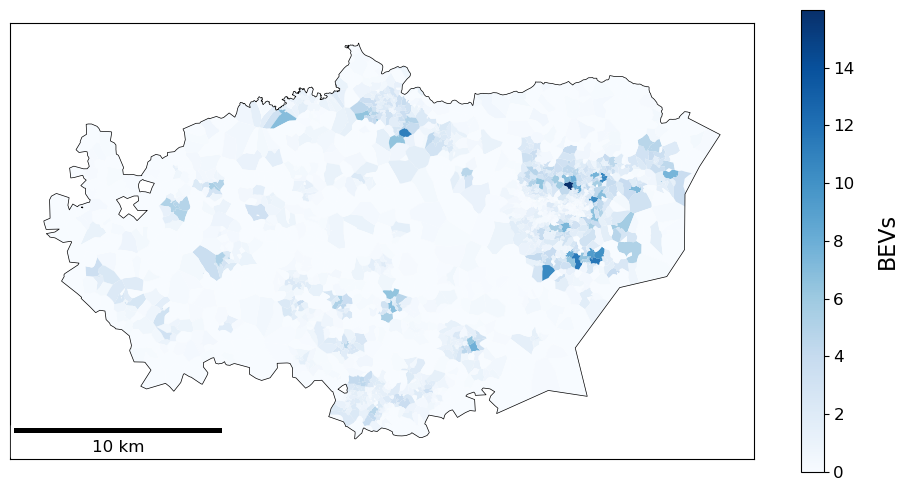

In [7]:
data_mapper.plot_mapped_data_mean(data_name='BEVs')